In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Paths to data
train_dir = '/content/drive/MyDrive/Deep_Learning/project/train_data'
val_dir = '/content/drive/MyDrive/Deep_Learning/project/val_data'

# Function to load images and extract labels from filenames
def load_data(img_dir):
    images = []
    labels = []
    for filename in os.listdir(img_dir):
        if filename.endswith('.jpg'):
            img_path = os.path.join(img_dir, filename)
            label = int(filename[0])


            img = Image.open(img_path).resize((256, 256))
            img = np.array(img)

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

train_images, train_labels = load_data(train_dir)
val_images, val_labels = load_data(val_dir)


In [ ]:
!pip install PyWavelets

In [ ]:
import pywt

# Function to apply wavelet transform
def apply_wavelet_transform(images):
    transformed_images = []
    for img in images:
        coeffs2 = pywt.dwt2(img, 'haar')
        cA, (cH, cV, cD) = coeffs2
        transformed_images.append(cA.flatten())

    return np.array(transformed_images)

train_wavelet = apply_wavelet_transform(train_images)
val_wavelet = apply_wavelet_transform(val_images)


In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
np.random.seed(42)


pca = PCA(n_components=150, random_state=42)
train_pca = pca.fit_transform(train_wavelet)
val_pca1 = pca.transform(val_wavelet)



In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


train_pca= scaler.fit_transform(train_pca)


val_pca = scaler.transform(val_pca1)

np.save('/content/drive/MyDrive/Deep_Learning/project/train_pca.npy', train_pca) #saving train_pca for later

# Print the min and max values to verify normalization
print(f"Min  {train_pca.min()}")
print(f"Max  {train_pca.max()}")


Min  0.0
Max  1.0000000000000002


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers,regularizers

# Define the MLP model
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(train_pca.shape[1],)))

model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))


model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.001)))


model.add(layers.Dense(60, activation='softmax'))



optimizer = optimizers.Adam()


model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint_filepath = '/content/drive/MyDrive/Deep_Learning/project/trained_weights.weights.h5'


checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)






history = model.fit(train_pca, train_labels, epochs=300, batch_size=32, validation_data=(val_pca, val_labels), callbacks=[checkpoint_callback])


Epoch 1/300
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1691 - loss: 2.9029
Epoch 1: val_accuracy improved from -inf to 0.18333, saving model to /content/drive/MyDrive/Deep_Learning/project/trained_weights.weights.h5
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1705 - loss: 2.8638 - val_accuracy: 0.1833 - val_loss: 2.1390
Epoch 2/300
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2047 - loss: 2.1234
Epoch 2: val_accuracy did not improve from 0.18333
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2043 - loss: 2.1222 - val_accuracy: 0.1833 - val_loss: 2.0877
Epoch 3/300
85/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1897 - loss: 2.0392
Epoch 3: val_accuracy improved from 0.18333 to 0.20500, saving model to /content/drive/MyDrive/Deep_Learning/project/trained_weights.weights.h5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1891 - loss: 2.0394 - val_accuracy: 0.2050 - val_loss: 2.0219
Epoch 4/300
88/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_pca, val_labels)
print(f'Validation accuracy: {val_accuracy}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3433 - loss: 2.1204 
Validation accuracy: 0.34166666865348816


Epochs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,

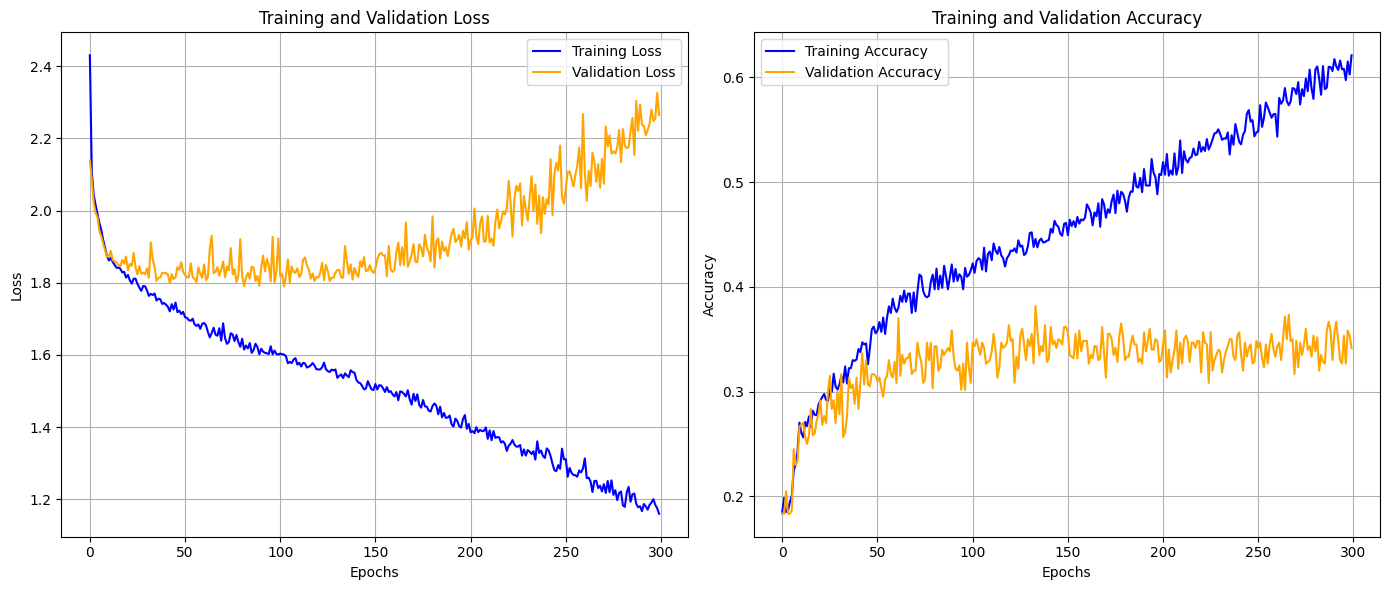

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#
best_val_accuracy = max(val_accuracy)
best_epoch = val_accuracy.index(best_val_accuracy) + 1
best_train_loss = train_loss[best_epoch - 1]
best_train_accuracy = train_accuracy[best_epoch - 1]

# Print metrics
print("Epochs:", list(range(1, len(train_loss) + 1)))
print("Training Loss: ", train_loss)
print("Validation Loss: ", val_loss)
print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

# Print the best metrics
print("\nBest Validation Accuracy: {:.4f} at Epoch {}".format(best_val_accuracy, best_epoch))
print("Corresponding Training Loss: {:.4f}".format(best_train_loss))
print("Corresponding Training Accuracy: {:.4f}".format(best_train_accuracy))

# Print the epoch number which has the best model
print("Epoch number with the best model weights: {}".format(best_epoch))

# Plotting the Training and Validation Loss
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()






**INSTRUCTIONS FOR TESTING**:
**IN THE ZIP FILE THERE ARE TWO ADDITIONAL FILE** **NAMED:-**

**1) train_pca.npy - CONTAINS WAVELET TRANSFORMED** **TRAIN VALUES NECESSARY FOR FITTING PCA VALUES**

**2) trained_weights.weights.h5 - CONTAINS THE TRAINED MODEL WEIGHTS.**

**FURTHER THE TEST DATA FILES NEED TO BE LOADED**

**PROVIDE THE PATHS TO THESE FILES WHEREVER NECESSARY**

In [ ]:
 def load_data(img_dir):
     images = []
     labels = []
     for filename in os.listdir(img_dir):
         if filename.endswith('.jpg'):
             img_path = os.path.join(img_dir, filename)
             label = int(filename[0])


             img = Image.open(img_path).resize((256, 256))
             img = np.array(img)

             images.append(img)
             labels.append(label)

     return np.array(images), np.array(labels)

 def apply_wavelet_transform(images):
     transformed_images = []
     for img in images:
         coeffs2 = pywt.dwt2(img, 'haar')
         cA, (cH, cV, cD) = coeffs2
         transformed_images.append(cA.flatten())

     return np.array(transformed_images)



test_img_dir = '/content/drive/MyDrive/Deep_Learning/project/val_data' #PROVIDE PATH TO TEST DATA FOLDER

test_images, test_labels=load_data(test_img_dir)


train_pca = np.load('/content/drive/MyDrive/Deep_Learning/project/train_pca.npy') #PROVIDE PATH TO 'train_pca.npy'

pca = PCA(n_components=150, random_state=42)
train_pca = pca.fit_transform(train_wavelet)


test_pca = pca.transform(test_wavelet)

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scaler.fit(train_pca)
test_pca = scaler.transform(test_pca)



model.load_weights('/content/drive/MyDrive/Deep_Learning/project/trained_weights.weights.h5') #PROVIDE PATH TO 'trained_weights.weights.h5'
test_predictions = model.predict(test_pca)


predicted_labels = np.argmax(test_predictions, axis=1)




def calculate_metrics(y_true, y_pred):


    if isinstance(y_true, np.ndarray):
        y_true = y_true.tolist()
    if isinstance(y_pred, np.ndarray):
        y_pred = y_pred.tolist()


    true_positive = true_negative = false_positive = false_negative = 0


    for true, pred in zip(y_true, y_pred):
        if true == pred:
            if true == 1:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if pred == 1:
                false_positive += 1
            else:
                false_negative += 1

    # Calculate metrics
    accuracy = (true_positive + true_negative) / len(y_true)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

    return metrics


metrics = calculate_metrics(test_labels, predicted_labels)

# Print the calculated metrics
print(f"Test Accuracy: {metrics['accuracy'] * 100:.2f}%")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-Score: {metrics['f1_score']:.4f}")




19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 38.17%
Precision: 0.3304
Recall: 0.1111
F1-Score: 0.1663
